In [70]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib
matplotlib.rcParams['font.family'].insert(0, 'Malgun Gothic') 
%matplotlib inline

# 1. openAPI 활용 및 json 데이터 읽기
## API : Application Programming Interface
## 서울시 데이터 포털에서 공공 API 활용하기
### 서울시 동별 인구통계
### http://data.seoul.go.kr/dataList/datasetView.do?infId=10043&srvType=S&serviceKind=2&currentPageNo=1

### json (Java Script Object Notation)

### 1) json 설명: https://ko.wikipedia.org/wiki/JSON
### 2) json online editor: https://jsoneditoronline.org/

In [6]:
sample = ' { \
    "이름": "김지아", \
    "나이": 25, \
    "성별": "여", \
    "주소": "서울특별시 양천구 목동",\
    "특기": ["농구", "도술"],\
    "가족관계": {"#": 2, "아버지": "홍판서", "어머니": "춘섬"},\
    "회사": "경기 수원시 팔달구 우만동"\
 }'

# 2. folium 을 활용한 지도 시각화

In [12]:
#folium 라이브러리 설치
# anaconda prompt에서 'pip install folium' 실행
import folium

# 3. 서울시 유동인구 분석

## 데이터 적재

In [6]:
유동인구 = pd.read_excel('data/서울시유동인구/0_유동인구_유동인구기본_2015.xlsx', skiprows=[0,1,3])

In [7]:
유동인구.head()

,ID유동인구조사,조사지점코드,조사구분,조사요일,시간대,유동인구수,년도
0,1,30-001,지하철,금,07시-08시,129.0,2015
1,2,30-001,지하철,금,08시-09시,112.5,2015
2,3,30-001,지하철,금,09시-10시,108.0,2015
3,4,30-001,지하철,금,10시-11시,94.5,2015
4,5,30-001,지하철,금,11시-12시,87.0,2015


In [8]:
data = pd.read_excel('data/서울시유동인구/4_유동인구_조사지점정보_2015.xlsx', 
                    skiprows=[0,1,3], sheet_name = None)

In [9]:
data.keys()

dict_keys(['유동인구_조사지점정보_2015', 'FTPTH_STLE_CN', 'GU_CD', 'DONG_CD', 'SM_GU_CD'])

In [10]:
조사지점정보 = data['유동인구_조사지점정보_2015']
구코드 = data['GU_CD']
동코드 = data['DONG_CD']

In [12]:
조사지점정보.head()

,조사지점코드,조사지점명,구코드,동코드,주번지,부번지,도로명,보도너비,차선수,버스차로유무,...,지구중심상세내용,도심부도심지역명,용도구분,거주유형구분,입지유형명,X좌표,Y좌표,집계구코드,년도,조사구분
0,01-003,신흥모피명품전문크리닝.,11010.0,1101055.0,127,11,NaN,3.0,8.0,유,...,NaN,NaN,2종주거,NaN,NaN,196423.97707,455511.52968,1.101055e+12,2015,본조사
1,01-004,GS25,11010.0,1101055.0,94,2,세검정로 230,3.0,7.0,유,...,NaN,NaN,2종주거,NaN,NaN,196315.80243,455621.38262,1.101055e+12,2015,본조사
2,01-005,세검정정류장,11010.0,1101055.0,92,0,세검정길,4.0,5.0,유,...,NaN,NaN,1종주거,NaN,NaN,196357.17125,455680.82580,1.101055e+12,2015,본조사
3,01-008,안성타워內 굿모닝파워공인중개사.,11010.0,1101056.0,72,72,NaN,4.0,4.0,유,...,NaN,NaN,2종주거,NaN,NaN,197904.19277,456718.34996,1.101056e+12,2015,본조사
4,01-009,복실 손뜨기.,11010.0,1101056.0,88,46,NaN,2.0,7.0,유,...,NaN,NaN,2종주거,NaN,NaN,196360.44943,456405.89296,1.101056e+12,2015,본조사


In [13]:
구코드.head()

,구코드,구명,년도
0,11010,종로구,2015
1,11020,중구,2015
2,11030,용산구,2015
3,11040,성동구,2015
4,11050,광진구,2015


In [14]:
동코드.head()

,구코드,동코드,구명,동명,년도
0,11010,1101053,종로구,사직동,2015
1,11010,1101054,종로구,삼청동,2015
2,11010,1101055,종로구,부암동,2015
3,11010,1101056,종로구,평창동,2015
4,11010,1101057,종로구,무악동,2015


In [15]:
조사지점정보

,조사지점코드,조사지점명,구코드,동코드,주번지,부번지,도로명,보도너비,차선수,버스차로유무,...,지구중심상세내용,도심부도심지역명,용도구분,거주유형구분,입지유형명,X좌표,Y좌표,집계구코드,년도,조사구분
0,01-003,신흥모피명품전문크리닝.,11010.0,1101055.0,127,11,NaN,3.0,8.0,유,...,NaN,NaN,2종주거,NaN,NaN,196423.97707,455511.52968,1.101055e+12,2015,본조사
1,01-004,GS25,11010.0,1101055.0,94,2,세검정로 230,3.0,7.0,유,...,NaN,NaN,2종주거,NaN,NaN,196315.80243,455621.38262,1.101055e+12,2015,본조사
2,01-005,세검정정류장,11010.0,1101055.0,92,0,세검정길,4.0,5.0,유,...,NaN,NaN,1종주거,NaN,NaN,196357.17125,455680.82580,1.101055e+12,2015,본조사
3,01-008,안성타워內 굿모닝파워공인중개사.,11010.0,1101056.0,72,72,NaN,4.0,4.0,유,...,NaN,NaN,2종주거,NaN,NaN,197904.19277,456718.34996,1.101056e+12,2015,본조사
4,01-009,복실 손뜨기.,11010.0,1101056.0,88,46,NaN,2.0,7.0,유,...,NaN,NaN,2종주거,NaN,NaN,196360.44943,456405.89296,1.101056e+12,2015,본조사
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,40-020,원서공원 입구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,북촌
1496,40-021,커피 Biwon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,북촌
1497,40-022,용수산 비원점,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,북촌
1498,40-023,한정식 장원,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,북촌


In [16]:
정제된조사지점정보 = pd.merge(조사지점정보, 구코드)

In [17]:
정제된조사지점정보 = pd.merge(정제된조사지점정보, 동코드)

In [18]:
정제된조사지점정보.head()

,조사지점코드,조사지점명,구코드,동코드,주번지,부번지,도로명,보도너비,차선수,버스차로유무,...,용도구분,거주유형구분,입지유형명,X좌표,Y좌표,집계구코드,년도,조사구분,구명,동명
0,01-003,신흥모피명품전문크리닝.,11010.0,1101055.0,127,11,NaN,3.0,8.0,유,...,2종주거,NaN,NaN,196423.97707,455511.52968,1.101055e+12,2015,본조사,종로구,부암동
1,01-004,GS25,11010.0,1101055.0,94,2,세검정로 230,3.0,7.0,유,...,2종주거,NaN,NaN,196315.80243,455621.38262,1.101055e+12,2015,본조사,종로구,부암동
2,01-005,세검정정류장,11010.0,1101055.0,92,0,세검정길,4.0,5.0,유,...,1종주거,NaN,NaN,196357.17125,455680.82580,1.101055e+12,2015,본조사,종로구,부암동
3,01-008,안성타워內 굿모닝파워공인중개사.,11010.0,1101056.0,72,72,NaN,4.0,4.0,유,...,2종주거,NaN,NaN,197904.19277,456718.34996,1.101056e+12,2015,본조사,종로구,평창동
4,01-009,복실 손뜨기.,11010.0,1101056.0,88,46,NaN,2.0,7.0,유,...,2종주거,NaN,NaN,196360.44943,456405.89296,1.101056e+12,2015,본조사,종로구,평창동


## 3.2 데이터 탐색 

### 3.2.1 유동인구 데이터 탐색

In [19]:
유동인구.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102956 entries, 0 to 102955
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID유동인구조사  102956 non-null  int64  
 1   조사지점코드    102956 non-null  object 
 2   조사구분      102956 non-null  object 
 3   조사요일      102956 non-null  object 
 4   시간대       102956 non-null  object 
 5   유동인구수     102956 non-null  float64
 6   년도        102956 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 5.5+ MB


In [20]:
유동인구.isnull().sum()

ID유동인구조사    0
조사지점코드      0
조사구분        0
조사요일        0
시간대         0
유동인구수       0
년도          0
dtype: int64

In [22]:
# 조사지점의 갯수 출력
유동인구.조사지점코드.unique()

array(['30-001', '30-002', '30-003', ..., '25-434', '25-463', '25-815'],
      dtype=object)

In [23]:
유동인구.조사구분.unique()

array(['지하철', '북촌', '본조사', '계절요인조사'], dtype=object)

In [31]:
유동인구.조사구분.value_counts()

본조사       85890
계절요인조사    14000
지하철        2058
북촌         1008
Name: 조사구분, dtype: int64

In [36]:
유동인구.조사구분.unique().size

4

In [30]:
columns = ['조사구분', '조사요일', '시간대']
for col in columns:
    print('-'*10,col,'-'*10)
    print(  유동인구[col].value_counts()  )

---------- 조사구분 ----------
본조사       85890
계절요인조사    14000
지하철        2058
북촌         1008
Name: 조사구분, dtype: int64
---------- 조사요일 ----------
토    21000
금    20986
수    19978
월    19978
화    18046
목     2968
Name: 조사요일, dtype: int64
---------- 시간대 ----------
16시-17시    7354
20시-21시    7354
15시-16시    7354
07시-08시    7354
11시-12시    7354
13시-14시    7354
17시-18시    7354
10시-11시    7354
08시-09시    7354
14시-15시    7354
19시-20시    7354
18시-19시    7354
12시-13시    7354
09시-10시    7354
Name: 시간대, dtype: int64


In [32]:
# 조사구분이 본조사인 데이터만 선택해서 활용
정제된유동인구 = 유동인구[유동인구.조사구분 == '본조사']

In [34]:
# 1. 유동인구 조사지점 갯수 확인
print('정제 전 조사지점수:', 유동인구.조사지점코드.unique().size)
print('정제 후 조사지점수:', 정제된유동인구.조사지점코드.unique().size)

정제 전 조사지점수: 1300
정제 후 조사지점수: 1227


In [38]:
# 2. 조사지점별 조사 횟수 확인
유동인구.조사지점코드.value_counts()

23-035     140
11-003     140
24-2177    140
03-048     140
25-238     140
          ... 
40-011      42
31-002      42
33-012      42
37-016      42
35-006      42
Name: 조사지점코드, Length: 1300, dtype: int64

In [40]:
print(유동인구.조사지점코드.value_counts().value_counts())
print(정제된유동인구.조사지점코드.value_counts().value_counts())

70     1027
140     200
42       73
Name: 조사지점코드, dtype: int64
70    1227
Name: 조사지점코드, dtype: int64


In [41]:
정제된유동인구.시간대.value_counts().sort_index()

07시-08시    6135
08시-09시    6135
09시-10시    6135
10시-11시    6135
11시-12시    6135
12시-13시    6135
13시-14시    6135
14시-15시    6135
15시-16시    6135
16시-17시    6135
17시-18시    6135
18시-19시    6135
19시-20시    6135
20시-21시    6135
Name: 시간대, dtype: int64

In [45]:
정제된유동인구.pivot_table(index='조사요일', columns='시간대', 
                   values='ID유동인구조사', aggfunc='sum')

시간대,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,14시-15시,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시
조사요일,,,,,,,,,,,,,,
금,56413779,56415006,56416233,56417460,56418687,56419914,56421141,56422368,56423595,56424822,56426049,56427276,56428503,56429730
목,466278,466286,466294,466302,466310,466318,466326,466334,466342,466350,466358,466366,466374,466382
수,56431069,56432296,56433523,56434750,56435977,56437204,56438431,56439658,56440885,56442112,56443339,56444566,56445793,56447020
월,56448247,56449474,56450701,56451928,56453155,56454382,56455609,56456836,56458063,56459290,56460517,56461744,56462971,56464198
토,56465425,56466652,56467879,56469106,56470333,56471560,56472787,56474014,56475241,56476468,56477695,56478922,56480149,56481376
화,56015877,56017096,56018315,56019534,56020753,56021972,56023191,56024410,56025629,56026848,56028067,56029286,56030505,56031724


In [47]:
정제된유동인구.pivot_table(index='조사요일', columns='시간대', 
                   values='ID유동인구조사', aggfunc='count')

시간대,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,14시-15시,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시
조사요일,,,,,,,,,,,,,,
금,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227
목,8,8,8,8,8,8,8,8,8,8,8,8,8,8
수,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227
월,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227
토,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227
화,1219,1219,1219,1219,1219,1219,1219,1219,1219,1219,1219,1219,1219,1219


### 3.2.2 조사지점 데이터 탐색

In [49]:
조사지점정보.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 37 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   조사지점코드    1500 non-null   object 
 1   조사지점명     1500 non-null   object 
 2   구코드       1408 non-null   float64
 3   동코드       1408 non-null   float64
 4   주번지       1418 non-null   object 
 5   부번지       1373 non-null   object 
 6   도로명       1233 non-null   object 
 7   보도너비      1421 non-null   float64
 8   차선수       1421 non-null   float64
 9   버스차로유무    1421 non-null   object 
 10  중앙선여부     1421 non-null   object 
 11  장애물유무     1421 non-null   object 
 12  장애물종류     1421 non-null   object 
 13  보행도로구분    1421 non-null   object 
 14  점자블록유무    1421 non-null   object 
 15  경사로유무     1421 non-null   object 
 16  펜스유무      1421 non-null   object 
 17  버스정류장유무   1421 non-null   object 
 18  기타시설유무    0 non-null      float64
 19  지하철유무     1421 non-null   object 
 20  횡단보도유무    1421 non-null   obje

In [51]:
# 조사구분이 본조사인 데이터만 선택
# 정제된조사지점정보.조사구분.value_counts()
정제된조사지점정보 = 정제된조사지점정보[정제된조사지점정보.조사구분 == '본조사']

In [52]:
정제된조사지점정보 = 정제된조사지점정보[['조사지점코드', '조사지점명', 
                       '구코드', '동코드','구명', '동명', 'X좌표', 'Y좌표']]

In [54]:
# 구코드가 NaN인 데이터를 제거
조사지점정보[조사지점정보.구코드.isnull()]

,조사지점코드,조사지점명,구코드,동코드,주번지,부번지,도로명,보도너비,차선수,버스차로유무,...,지구중심상세내용,도심부도심지역명,용도구분,거주유형구분,입지유형명,X좌표,Y좌표,집계구코드,년도,조사구분
86,02-001,태화빌딩,NaN,NaN,247,8,퇴계로 382,3.0,6.0,유,...,NaN,NaN,일반상업,NaN,NaN,201229.42149,451734.49400,1.102069e+12,2015,본조사
87,02-002,성동공업고등학교정문 우측 담벽,NaN,NaN,1-1,1,다산로 290,3.0,6.0,유,...,NaN,NaN,일반상업,NaN,NaN,201422.94083,452156.57649,1.102069e+12,2015,본조사
89,02-008,돈신댓잎갈비,NaN,NaN,294,64,금호동길,2.0,5.0,유,...,NaN,NaN,2종주거,NaN,NaN,201281.67500,451147.01769,1.102072e+12,2015,본조사
113,02-093,성동 그리스도의 교회 앞,NaN,NaN,45,37,ㅡ,2.0,4.0,유,...,NaN,NaN,2종주거,NaN,NaN,201630.54844,451160.73017,1.102073e+12,2015,본조사
116,02-105,참꽃 스튜디오,NaN,NaN,247,4,왕십리 길,3.0,6.0,유,...,NaN,NaN,일반상업,NaN,NaN,201237.29334,451746.57843,1.102069e+12,2015,본조사
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,40-020,원서공원 입구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,북촌
1496,40-021,커피 Biwon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,북촌
1497,40-022,용수산 비원점,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,북촌
1498,40-023,한정식 장원,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,북촌


In [56]:
조사지점정보[-조사지점정보.구코드.isnull()]

,조사지점코드,조사지점명,구코드,동코드,주번지,부번지,도로명,보도너비,차선수,버스차로유무,...,지구중심상세내용,도심부도심지역명,용도구분,거주유형구분,입지유형명,X좌표,Y좌표,집계구코드,년도,조사구분
0,01-003,신흥모피명품전문크리닝.,11010.0,1101055.0,127,11,NaN,3.0,8.0,유,...,NaN,NaN,2종주거,NaN,NaN,196423.97707,455511.52968,1.101055e+12,2015,본조사
1,01-004,GS25,11010.0,1101055.0,94,2,세검정로 230,3.0,7.0,유,...,NaN,NaN,2종주거,NaN,NaN,196315.80243,455621.38262,1.101055e+12,2015,본조사
2,01-005,세검정정류장,11010.0,1101055.0,92,0,세검정길,4.0,5.0,유,...,NaN,NaN,1종주거,NaN,NaN,196357.17125,455680.82580,1.101055e+12,2015,본조사
3,01-008,안성타워內 굿모닝파워공인중개사.,11010.0,1101056.0,72,72,NaN,4.0,4.0,유,...,NaN,NaN,2종주거,NaN,NaN,197904.19277,456718.34996,1.101056e+12,2015,본조사
4,01-009,복실 손뜨기.,11010.0,1101056.0,88,46,NaN,2.0,7.0,유,...,NaN,NaN,2종주거,NaN,NaN,196360.44943,456405.89296,1.101056e+12,2015,본조사
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,25-430,신동아생활용품DC마트,11250.0,1125072.0,492,2,상암로11길 24,4.0,1.0,무,...,NaN,NaN,준주거,NaN,NaN,211375.75228,450168.33297,1.125072e+12,2015,계절요인조사
1423,25-430,신동아생활용품DC마트,11250.0,1125072.0,492,2,상암로11길 24,4.0,1.0,무,...,NaN,NaN,준주거,NaN,NaN,211375.75228,450168.33297,1.125072e+12,2015,본조사
1424,25-434,햇빛도서관,11250.0,1125058.0,510,23,없음,5.0,1.0,무,...,NaN,NaN,2종주거,NaN,NaN,211026.96705,450051.61417,1.125058e+12,2015,본조사
1425,25-463,길동 GS 25 편의점,11250.0,1125074.0,456,2,없음,2.0,3.0,유,...,NaN,NaN,일반상업,NaN,NaN,212146.74179,448482.40125,1.125074e+12,2015,본조사


In [57]:
조사지점정보[조사지점정보.구코드.notnull()]

,조사지점코드,조사지점명,구코드,동코드,주번지,부번지,도로명,보도너비,차선수,버스차로유무,...,지구중심상세내용,도심부도심지역명,용도구분,거주유형구분,입지유형명,X좌표,Y좌표,집계구코드,년도,조사구분
0,01-003,신흥모피명품전문크리닝.,11010.0,1101055.0,127,11,NaN,3.0,8.0,유,...,NaN,NaN,2종주거,NaN,NaN,196423.97707,455511.52968,1.101055e+12,2015,본조사
1,01-004,GS25,11010.0,1101055.0,94,2,세검정로 230,3.0,7.0,유,...,NaN,NaN,2종주거,NaN,NaN,196315.80243,455621.38262,1.101055e+12,2015,본조사
2,01-005,세검정정류장,11010.0,1101055.0,92,0,세검정길,4.0,5.0,유,...,NaN,NaN,1종주거,NaN,NaN,196357.17125,455680.82580,1.101055e+12,2015,본조사
3,01-008,안성타워內 굿모닝파워공인중개사.,11010.0,1101056.0,72,72,NaN,4.0,4.0,유,...,NaN,NaN,2종주거,NaN,NaN,197904.19277,456718.34996,1.101056e+12,2015,본조사
4,01-009,복실 손뜨기.,11010.0,1101056.0,88,46,NaN,2.0,7.0,유,...,NaN,NaN,2종주거,NaN,NaN,196360.44943,456405.89296,1.101056e+12,2015,본조사
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,25-430,신동아생활용품DC마트,11250.0,1125072.0,492,2,상암로11길 24,4.0,1.0,무,...,NaN,NaN,준주거,NaN,NaN,211375.75228,450168.33297,1.125072e+12,2015,계절요인조사
1423,25-430,신동아생활용품DC마트,11250.0,1125072.0,492,2,상암로11길 24,4.0,1.0,무,...,NaN,NaN,준주거,NaN,NaN,211375.75228,450168.33297,1.125072e+12,2015,본조사
1424,25-434,햇빛도서관,11250.0,1125058.0,510,23,없음,5.0,1.0,무,...,NaN,NaN,2종주거,NaN,NaN,211026.96705,450051.61417,1.125058e+12,2015,본조사
1425,25-463,길동 GS 25 편의점,11250.0,1125074.0,456,2,없음,2.0,3.0,유,...,NaN,NaN,일반상업,NaN,NaN,212146.74179,448482.40125,1.125074e+12,2015,본조사


### 3.2.3 데이터 합치기 - 분석에 필요한 컬럼들만 선택 (어떤 분석을 할지에 따라 변경 가능함)

In [59]:
최종데이터 = pd.merge(정제된유동인구, 정제된조사지점정보, on='조사지점코드')

In [60]:
최종데이터.head()

,ID유동인구조사,조사지점코드,조사구분,조사요일,시간대,유동인구수,년도,조사지점명,구코드,동코드,구명,동명,X좌표,Y좌표
0,3067,01-003,본조사,금,07시-08시,21.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,종로구,부암동,196423.97707,455511.52968
1,3068,01-003,본조사,금,08시-09시,36.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,종로구,부암동,196423.97707,455511.52968
2,3069,01-003,본조사,금,09시-10시,27.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,종로구,부암동,196423.97707,455511.52968
3,3070,01-003,본조사,금,10시-11시,51.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,종로구,부암동,196423.97707,455511.52968
4,3071,01-003,본조사,금,11시-12시,36.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,종로구,부암동,196423.97707,455511.52968


In [61]:
최종데이터.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84840 entries, 0 to 84839
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID유동인구조사  84840 non-null  int64  
 1   조사지점코드    84840 non-null  object 
 2   조사구분      84840 non-null  object 
 3   조사요일      84840 non-null  object 
 4   시간대       84840 non-null  object 
 5   유동인구수     84840 non-null  float64
 6   년도        84840 non-null  int64  
 7   조사지점명     84840 non-null  object 
 8   구코드       84840 non-null  float64
 9   동코드       84840 non-null  float64
 10  구명        84840 non-null  object 
 11  동명        84840 non-null  object 
 12  X좌표       84840 non-null  float64
 13  Y좌표       84840 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 9.7+ MB


## (실습 #1) 유동인구를 요일과 시간대 별로 분석하여, 유동인구가 가장 많은 상위 10개의 요일과 시간대를 출력. (e.g., 금요일 18시-19시가 유동인구가 가장 많음.)


In [63]:
최종데이터.pivot_table(index = ['조사요일', '시간대'],
                 values='유동인구수', aggfunc = 'mean')\
                .sort_values(by = '유동인구수', ascending=False).head(10)

유동인구수
조사요일 시간대                
금    18시-19시  702.022277
수    18시-19시  684.346535
토    18시-19시  669.801980
화    18시-19시  664.955980
월    18시-19시  643.049505
금    19시-20시  639.497525
토    17시-18시  614.061881
     19시-20시  600.896040
화    19시-20시  600.266611
수    19시-20시  582.648515

## (실습 #2) 서울시 각 구별 전체 유동인구 분석
### 구별로 조사지점의 개수가 다르므로, 조사지점 당 평균 유동인구수로 분석

In [66]:
# 각 구별 조사지점 개수 확인
최종데이터.pivot_table(index='구명', values='조사지점코드', aggfunc='count')

,조사지점코드
구명,
강남구,5600
강동구,2520
강북구,2310
강서구,2450
관악구,2870
광진구,2730
구로구,3290
금천구,1610
노원구,4970


In [69]:
# 각 구별 조사지점 개수 확인 - 중복제외
최종데이터.pivot_table(index='구명', values='조사지점코드', aggfunc=Series.nunique)

,조사지점코드
구명,
강남구,80
강동구,36
강북구,33
강서구,35
관악구,41
광진구,39
구로구,47
금천구,23
노원구,71


In [71]:
구별통계 = 최종데이터.pivot_table(index = ['구명'],
                 values='유동인구수', aggfunc = 'mean')

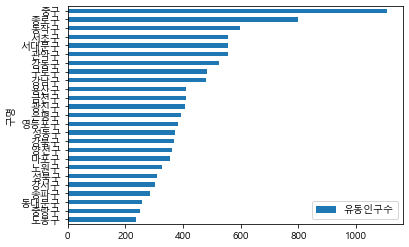

In [75]:
구별통계.sort_values(by = '유동인구수').plot(kind='barh')

## (실습 #3) 서울시 각 구별로 출퇴근 시간의 유동인구 분석 (출퇴근 시간은 7시-10시, 18시-21시로 가정함)


In [76]:
최종데이터

,ID유동인구조사,조사지점코드,조사구분,조사요일,시간대,유동인구수,년도,조사지점명,구코드,동코드,구명,동명,X좌표,Y좌표
0,3067,01-003,본조사,금,07시-08시,21.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,종로구,부암동,196423.97707,455511.52968
1,3068,01-003,본조사,금,08시-09시,36.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,종로구,부암동,196423.97707,455511.52968
2,3069,01-003,본조사,금,09시-10시,27.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,종로구,부암동,196423.97707,455511.52968
3,3070,01-003,본조사,금,10시-11시,51.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,종로구,부암동,196423.97707,455511.52968
4,3071,01-003,본조사,금,11시-12시,36.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,종로구,부암동,196423.97707,455511.52968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84835,88952,25-815,본조사,화,16시-17시,672.0,2015,현대자동차 성내지점,11250.0,1125066.0,강동구,성내2동,211778.66913,448392.48055
84836,88953,25-815,본조사,화,17시-18시,732.0,2015,현대자동차 성내지점,11250.0,1125066.0,강동구,성내2동,211778.66913,448392.48055
84837,88954,25-815,본조사,화,18시-19시,1077.0,2015,현대자동차 성내지점,11250.0,1125066.0,강동구,성내2동,211778.66913,448392.48055
84838,88955,25-815,본조사,화,19시-20시,753.0,2015,현대자동차 성내지점,11250.0,1125066.0,강동구,성내2동,211778.66913,448392.48055


In [95]:
Q35data = 최종데이터
Q35data = 최종데이터[최종데이터.시간대.isin(['07시-08시', '08시-09시', '09시-10시',
                                   '18시-19시', '19시-20시', '20시-21시'])]

In [96]:
Q35data

,ID유동인구조사,조사지점코드,조사구분,조사요일,시간대,유동인구수,년도,조사지점명,구코드,동코드,구명,동명,X좌표,Y좌표
0,3067,01-003,본조사,금,07시-08시,21.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,종로구,부암동,196423.97707,455511.52968
1,3068,01-003,본조사,금,08시-09시,36.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,종로구,부암동,196423.97707,455511.52968
2,3069,01-003,본조사,금,09시-10시,27.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,종로구,부암동,196423.97707,455511.52968
11,3078,01-003,본조사,금,18시-19시,48.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,종로구,부암동,196423.97707,455511.52968
12,3079,01-003,본조사,금,19시-20시,21.0,2015,신흥모피명품전문크리닝.,11010.0,1101055.0,종로구,부암동,196423.97707,455511.52968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84827,88944,25-815,본조사,화,08시-09시,723.0,2015,현대자동차 성내지점,11250.0,1125066.0,강동구,성내2동,211778.66913,448392.48055
84828,88945,25-815,본조사,화,09시-10시,360.0,2015,현대자동차 성내지점,11250.0,1125066.0,강동구,성내2동,211778.66913,448392.48055
84837,88954,25-815,본조사,화,18시-19시,1077.0,2015,현대자동차 성내지점,11250.0,1125066.0,강동구,성내2동,211778.66913,448392.48055
84838,88955,25-815,본조사,화,19시-20시,753.0,2015,현대자동차 성내지점,11250.0,1125066.0,강동구,성내2동,211778.66913,448392.48055


In [98]:
Q35data.pivot_table(index = ['시간대'],
                 values='유동인구수', aggfunc = 'mean')\
                .sort_values(by = '유동인구수', ascending=True)

,유동인구수
시간대,
07시-08시,238.779208
09시-10시,342.014851
08시-09시,399.084158
20시-21시,456.530693
19시-20시,600.558416
18시-19시,672.476238


## (실습 #4) 평일 유동인구와 주말 유동인구를 분석하여, 그 차이가 가장 많이 나는 상위 5개 구 정보를 출력


In [ ]:
최종데이터[최종데이터.조사요일.isin(['토','일'])]

In [102]:
Q36data = 최종데이터.pivot_table(index = ['구명'], columns=['조사요일'],
                 values='유동인구수', aggfunc = 'sum')

In [104]:
Q36data

조사요일,금,목,수,월,토,화
구명,,,,,,
강남구,569496.0,NaN,546648.0,529638.0,490740.0,540417.0
강동구,273054.0,NaN,264087.0,256119.0,273033.0,253554.0
강북구,172071.0,NaN,171723.0,168114.0,174369.0,168348.0
강서구,150525.0,NaN,151341.0,150081.0,143430.0,150063.0
관악구,333504.0,NaN,326382.0,318948.0,297183.0,318966.0
광진구,224124.0,NaN,217206.0,212811.0,231966.0,222249.0
구로구,324708.0,NaN,322299.0,319971.0,303135.0,318180.0
금천구,135210.0,NaN,136881.0,135369.0,112227.0,139626.0
노원구,336975.0,NaN,329154.0,321615.0,317169.0,323046.0


In [109]:
Q36data['주중'] = Q36data.sum(axis=1) - Q36data.토
Q36data['주말'] = Q36data.토

In [118]:
np.abs(Q36data.주중 - Q36data.주말).sort_values(ascending=False).head(5)

구명
중구      3001047.0
종로구     2488566.0
서초구     1936995.0
강남구     1695459.0
영등포구    1043478.0
dtype: float64

## (실습 #5) 유동인구의 수와 보행환경 정보를 분석 (보행환경 정보는 유동인구상세로그_2015.xlsx의 보행환경 컬럼 참고. 매우불만족(1), 약간불만족(2), 보통(3), 약간만족(4), 매우만족(5) )
### 5.1 보행 환경 개선이 시급한 곳 10군데를 선정. 



In [124]:
유동인구속성 = pd.read_excel('data/서울시유동인구/2_유동인구_속성조사_2015.xlsx', skiprows=[0,1,3])

In [126]:
유동인구속성.head()

,ID속성조사,조사지점코드,조사일자,조사요일,남여구분,조사시간대,조사시간대_텍스트,연령대,거주지,통행주목적,방문횟수,동행자명,교통수단,보행환경,직업명,년도
0,1,01-003,1016,금,여자,NaN,오전11시~오후2시,50-54세,종로구,업무관련,주1~2회,NaN,NaN,약간만족,전문/자유직,2015
1,2,01-003,1016,금,남자,NaN,오전11시~오후2시,60-64세,성북구,업무관련,주3~5회,NaN,NaN,매우만족,일용/작업직,2015
2,3,01-003,1016,금,남자,NaN,오전11시~오후2시,65세이상,종로구,업무관련,주3~5회,NaN,NaN,약간만족,일용/작업직,2015
3,4,01-003,1016,금,남자,NaN,오전7시30분~11시,45-49세,서대문구,출근,매일,NaN,NaN,약간만족,사무/기술직,2015
4,5,01-003,1016,금,남자,NaN,오전7시30분~11시,35-39세,도봉구,출근,매일,NaN,NaN,매우만족,사무/기술직,2015


In [129]:
Q37data = 유동인구속성.pivot_table(index='거주지', columns='보행환경', values='조사일자', aggfunc='count')

In [130]:
Q37data

보행환경,매우만족,매우불만족,보통,약간만족,약간불만족
거주지,,,,,
강남구,14,113,413,72,324
강동구,23,140,296,95,215
강북구,29,94,430,132,207
강서구,36,90,402,102,173
관악구,33,82,335,118,160
광진구,36,76,348,112,124
구로구,24,190,352,67,242
금천구,11,56,193,53,115
노원구,33,70,504,170,209


In [138]:
Q37 = (Q37data.매우불만족 * 1 + Q37data.약간불만족 * 2 + Q37data.보통 * 3 + Q37data.약간만족 * 4 + Q37data.매우만족 * 5) / Q37data.sum(axis=1)

In [141]:
Q37.sort_values().head(10)

거주지
구로구     2.420571
영등포구    2.501188
강남구     2.519231
강동구     2.539662
서초구     2.638251
금천구     2.644860
종로구     2.655617
동작구     2.683186
양천구     2.690848
송파구     2.704522
dtype: float64

### 5.2 보행환경점수가 가장 낮은 자치구 5개 찾기

In [142]:
Q37.sort_values().head(5)

거주지
구로구     2.420571
영등포구    2.501188
강남구     2.519231
강동구     2.539662
서초구     2.638251
dtype: float64

In [ ]:
# 개선시급지역을 지도에 시각화